<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/Praxis_AML_sessions/blob/main/Copy_of_EM_algo_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
data = np.random.normal(5,10,size=60000)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


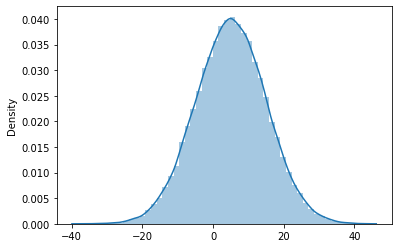

In [ ]:
sns.distplot(a=data)

In [ ]:
def prob(x,M,S):
    return (1/np.sqrt(2*(22/7)*S**2))*np.exp(-((x-M)**2)/(2*S**2))

def E_x(x,M,S):
    return x*prob(x,M,S)  

In [ ]:
M_0 = 0.0
S_0 = 1.0

log_lik_old = 0.0
d = 10.0
iterations = 0
tol = 0.00001

while d > tol:
    # Expectation Step
    p = np.array([prob(y,M_0,S_0) for y in data], dtype=np.float64)
    pr = p/p.sum()
    log_lik_new = sum(np.log(pr))

    # Maximization step
    M = sum(pr*data)
    S = np.sqrt(sum((data-M)**2)/len(data))

    # Replace old estimates by new ones
    M_0 = M
    S_0 = S

    # Diffrence in log likelihood value
    d = np.abs(log_lik_old - log_lik_new)

    # Replace old loglik value with the new one
    log_lik_old = log_lik_new

    iterations += 1

print(M,S,iterations)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


5.081274427416993 9.976183252608596 25


In [ ]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
auto_data = pd.read_csv(path, header=None, sep='\s+', na_values='?')
auto_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
vars = ['mpg','cyl','disp','hp','wt','acc','yr','origin','label']
auto_data.columns = vars
auto_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,label
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      392 non-null    float64
 4   wt      398 non-null    float64
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
 8   label   398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
auto_data = auto_data.dropna()

In [ ]:
cluster_data = auto_data[['mpg','disp','hp','wt','acc']]

In [ ]:
cluster_data_norm = StandardScaler().fit_transform(cluster_data)

In [ ]:
GMM = GaussianMixture(n_components=2)

In [ ]:
GMM.fit_predict(cluster_data_norm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
GMM.bic(cluster_data_norm)

2876.4918359658354

In [ ]:
BIC_SCORES = []
for n_comp in range(2,21):
    gm = GaussianMixture(n_components=n_comp)
    gm.fit(cluster_data_norm)
    bic_score = gm.bic(cluster_data_norm)
    BIC_SCORES.append(bic_score)

In [ ]:
BIC_SCORES

[2876.4918359658354,
 2664.838525329392,
 2697.3832640487126,
 2693.051539792221,
 2790.723236401437,
 2785.5288620579777,
 2790.961361617592,
 2855.3671741315616,
 2886.016553302927,
 2990.6605368688624,
 3033.7278679625133,
 3196.585538252213,
 3185.6982975126857,
 3280.721593700913,
 3319.272012475685,
 3503.154062268439,
 3415.8210551123548,
 3606.944252750783,
 3740.629830629021]

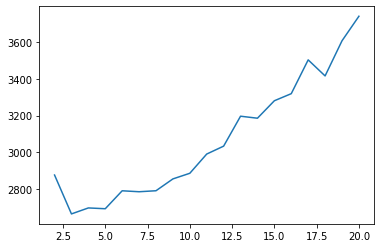

In [ ]:
sns.lineplot(x=list(range(2,21)),y=BIC_SCORES)

In [ ]:
GMM_best = GaussianMixture(n_components=3)
GMM_best.fit(cluster_data_norm)
final_cluster = GMM_best.predict(cluster_data_norm)

In [ ]:
final_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,

In [ ]:
prob = GMM_best.predict_proba(cluster_data_norm)

In [ ]:
prob

array([[4.73672197e-46, 9.97443674e-01, 2.55632621e-03],
       [2.02455504e-77, 9.99999994e-01, 6.18000929e-09],
       [5.47920136e-58, 9.99978053e-01, 2.19469193e-05],
       ...,
       [9.97294328e-01, 9.20403580e-17, 2.70567219e-03],
       [9.86497787e-01, 6.71005939e-12, 1.35022128e-02],
       [9.97704232e-01, 1.42450724e-17, 2.29576804e-03]])

In [ ]:
uncertainty = 1-prob.max(axis=1)
uncertainty[:10]

array([2.55632621e-03, 6.18000939e-09, 2.19469193e-05, 1.79019327e-05,
       7.03345061e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.77635684e-14])

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca_features = pca.fit_transform(cluster_data_norm)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pca_data_frame = pd.DataFrame(pca_features,columns=['PC1','PC2'])
pca_data_frame['size'] = uncertainty
pca_data_frame['col'] = final_cluster

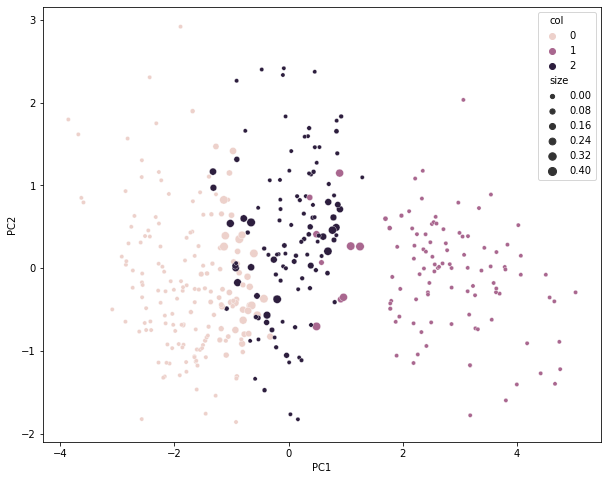

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',size='size',hue='col', data=pca_data_frame)